<a href="https://colab.research.google.com/github/abhimanyusethia12/ML_models/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing numby and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Generating training dataset
No_of_observations = 10  
X= np.random.rand(No_of_observations,1)                                #Generating a random 1x10 array
#adding bias factor to x
X = np.hstack((np.ones((No_of_observations, 1)), X))
#adding polynomial features to the array
X = np.hstack((
    X,
    (X[:, 1] ** 2).reshape((No_of_observations, 1)),
    (X[:, 1] ** 3).reshape((No_of_observations, 1)),
    (X[:, 1] ** 4).reshape((No_of_observations, 1))
))
No_of_dimensions = 4

actual_weight =  np.array([1, 0.5, -0.5, 2,-1])               #Random Weights taken for generation of training data
y = X@actual_weight                                      #Setting Y = X.w 


In [0]:
#normalising X
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

In [0]:
#implementing Hypothesis function
def hypothesis(X, weight):
  return X @ weight

In [0]:
#random initialisation of weights (theta)
weight = np.random.random(No_of_dimensions+1)
predictions = hypothesis(X, weight)

In [0]:
#implementing a loss function
def loss_function(weight, X, y):
  return np.mean(np.square(hypothesis(X, weight) - y))

In [0]:
#defining learning_rate (alpha)
#typical value of alpha is 0.01 
learning_rate = 0.01    

In [0]:
#implementing a training loop with 500 epochs
losses = []
for _ in range(500):
  weight = weight - learning_rate * (1/No_of_observations) * (X.T @ ((X @ weight) - y)) #this is a single gradient descent step
  losses.append(loss_function(weight, X, y))

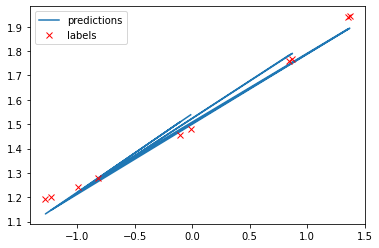

In [33]:
#plotting hypothesis function, after training loop and testing data
predictions = hypothesis(X, weight)
plt.plot(X[:, 1], predictions, label='predictions')
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend() 

In [34]:
#value of loss function for the model
losses[-1]

0.0018903169048130296

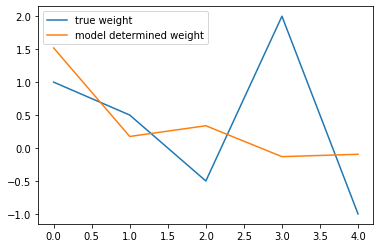

In [35]:
# plot our weight vs true weight
plt.plot(actual_weight, label='true weight')
plt.plot(weight, label='model determined weight')
plt.legend()
plt.show()
